In [8]:
import numpy as np
from keras import layers,models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [9]:
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
#vemos el tamano
train_data.shape

(60000, 28, 28)

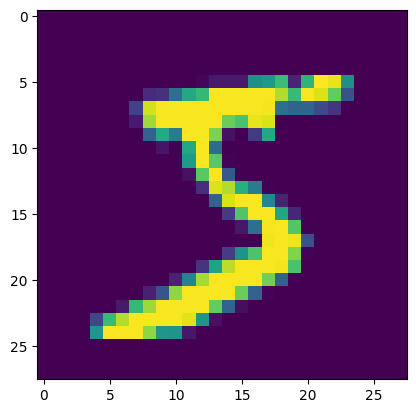

In [11]:
plt.imshow(train_data[0])

In [12]:
#Declaracion del modelo
model = models.Sequential()

In [14]:
#Agregamos las primeras capas
#Activation es el parametro que define la funcion de activacion de la neurona en este caso la funcion relu tiene las sigueitnes condiciones
# Si x <= 0 entonces x = 0 , Si x> 0 entonces x = al valor original de x
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Agregamos la siguietne capa de neuronas que serian 10 ya que son 10 posibles salidas del 0 - 9
#La funcion activacion softmax me da la probabilidad de cada una de las posibles salidas por eso es la ultima capa
model.add(layers.Dense(10,activation='softmax'))

In [16]:
#Compilamos nuestra red neuronal
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Redimensionamos la data de train a 2 Dimensiones para facilitar el uso de la red neuronal
x_train = train_data = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255 # Se cambia a float porque es mas facil para una red manejar decimales y 255 porque cada pixel va de 0 a 255 y si se hace la dimension el c=valor estara de 0-1

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [21]:
#Transformamos los labels ya que la red neuronal maneja mejor la informacion vectorial
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [22]:
#Informacion de train labels el numero 5
train_labels[0]

5

In [23]:
#Informacion en forma categorica
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [25]:
# Entrenamos la red
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8718 - loss: 0.4417
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1142
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9784 - loss: 0.0729
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0511
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9879 - loss: 0.0403


In [26]:
#Evaluamos
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9757 - loss: 0.0763


[0.0634266808629036, 0.9793000221252441]